# PROYECTO FINAL: 
#**Clasificación de residuos sólidos por medio del Deep learning** 

## Tratamiento de Señales III

###Carolina Bedoya Doria  CC.1037659334 

###Estefania Torres Zuluaga CC. 1039471113

####Enero 2021
####Universidad de Antioquia

**1.** Identificar un problema de aplicación de interés para aplicar las técnicas de Tratamiento de señales

**2.** Identificar el tipo de señal a procesar y la estrategia de aprendizaje (regresión, clasificación y/o clustering)

**3.** Definir el tipo de esquema a abordar (Extracción de características de la señal)

## **DESARROLLO DEL PROBLEMA:**

El Notebook presentado a continuación es construido con el objetivo de educarnos un poco respecto a los tipos de residuos sólidos, los cuales a diario solemos ignorar la manera de separarlos correctamente junto al gran respiro que podríamos regalarle a nuestro planeta si comenzamos a implementar estas buenas técnicas.  Por lo anterior, por medio de las técnicas de tratamiento de señales, que para nuestro caso será el Deep Learning ( o aprendizaje profundo), se busca entonces construir un modelo de aprendizaje que logre clasificar los residuos sólidos en 6 grupos diferentes: Papel, cartón, vidrio, plástico, metal y basura. 

Para lograr nuestro objetivo, se hace uso de un dataset recolectado previamente, el cual se encuentra disponible en este repositorio: [Dataset Trashnet](https://github.com/garythung/trashnet). 

Dicho dataset cuenta con un total de 2527 imágenes, las cuales fueron previamente escogidas y llevadas a un mismo tamaño para facilidad de nuestro modelo y se distribuyen así: 

*   Vidrio (glass): 501 
*   Papel (paper): 594
*   Cartón (cardboard): 403
*   Plástico (plastic): 482
*   Basura (trash): 137
*   Metal: 410




---





A continuación se describe detalladamente cada uno de los pasos a seguir para la construcción de nuestro modelo de clasificación 

## Base de datos:
En primer lugar se carga la base datos previamente mencionada.  El contenido de dicho dataset se extrae entonces de un archivo comprimido en .zip, el cual se encuentra dividido previamente en directorios que contienen la parte de entrenamiento y de validación y, a su vez, cada uno de ellos contiene un subdirectorio de cada una de las 6 clases de residuos sólidos a tratar, como se muestra a continuación.

In [ ]:
#!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/MyDrive/ProyectoFinalS3/dataset-resized.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/ProyectoFinalS3')
zip_ref.close()


Se separan los archivos segun las clases de residuos y dependiendo si son datos de entranamiento o validación.

In [ ]:
base_dir = '/content/drive/MyDrive/ProyectoFinalS3/dataset-resized/dataset-resized'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cardboard pictures
train_cardboard_dir = os.path.join(train_dir, 'cardboard')

# Directory with our training glass pictures
train_glass_dir = os.path.join(train_dir, 'glass')

# Directory with our training metal pictures
train_metal_dir = os.path.join(train_dir, 'metal')

# Directory with our training paper pictures
train_paper_dir = os.path.join(train_dir, 'papel')

# Directory with our training plastic pictures
train_plastic_dir = os.path.join(train_dir, 'plastic')

# Directory with our training trash pictures
train_trash_dir = os.path.join(train_dir, 'trash')



# Directory with our validation cardboard pictures
validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')

# Directory with our validation glass pictures
validation_glass_dir = os.path.join(validation_dir, 'glass')

# Directory with our validation metal pictures
validation_metal_dir = os.path.join(validation_dir, 'metal')

# Directory with our validation paper pictures
validation_paper_dir = os.path.join(validation_dir, 'paper')

# Directory with our validation plastic pictures
validation_plastic_dir = os.path.join(validation_dir, 'plastic')

# Directory with our validation trash pictures
validation_trash_dir = os.path.join(validation_dir, 'trash')

In [ ]:
print('total training cardboard images:', len(os.listdir(train_cardboard_dir)))
print('total training glass images:', len(os.listdir(train_glass_dir)))
print('total training metal images:', len(os.listdir(train_metal_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training plastic images:', len(os.listdir(train_plastic_dir)))
print('total training trash images:', len(os.listdir(train_trash_dir)))
print('total validation cardboard images:', len(os.listdir(validation_cardboard_dir)))
print('total validation glass images:', len(os.listdir(validation_glass_dir)))
print('total validation metal images:', len(os.listdir(validation_metal_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation plastic images:', len(os.listdir(validation_plastic_dir)))
print('total validation trash images:', len(os.listdir(validation_trash_dir)))

total training cardboard images: 282
total training glass images: 350
total training metal images: 287
total training paper images: 415
total training plastic images: 337
total training trash images: 96
total validation cardboard images: 121
total validation glass images: 151
total validation metal images: 123
total validation paper images: 179
total validation plastic images: 145
total validation trash images: 41


In [ ]:
train_cardboard_fnames = os.listdir(train_cardboard_dir)
print(train_cardboard_fnames[:10])

train_glass_fnames = os.listdir(train_glass_dir)
print(train_glass_fnames[:10])

train_metal_fnames = os.listdir(train_metal_dir)
print(train_metal_fnames[:10])

train_paper_fnames = os.listdir(train_paper_dir)
print(train_paper_fnames[:10])

train_plastic_fnames = os.listdir(train_plastic_dir)
print(train_plastic_fnames[:10])

train_trash_fnames = os.listdir(train_trash_dir)
train_trash_fnames.sort()
print(train_trash_fnames[:10])


['cardboard1.jpg', 'cardboard10.jpg', 'cardboard100.jpg', 'cardboard101.jpg', 'cardboard102.jpg', 'cardboard103.jpg', 'cardboard104.jpg', 'cardboard105.jpg', 'cardboard106.jpg', 'cardboard107.jpg']
['glass1.jpg', 'glass10.jpg', 'glass100.jpg', 'glass101.jpg', 'glass102.jpg', 'glass103.jpg', 'glass104.jpg', 'glass105.jpg', 'glass106.jpg', 'glass107.jpg']
['metal1.jpg', 'metal10.jpg', 'metal100.jpg', 'metal101.jpg', 'metal102.jpg', 'metal103.jpg', 'metal104.jpg', 'metal105.jpg', 'metal106.jpg', 'metal107.jpg']
['paper1.jpg', 'paper10.jpg', 'paper100.jpg', 'paper101.jpg', 'paper102.jpg', 'paper103.jpg', 'paper104.jpg', 'paper105.jpg', 'paper106.jpg', 'paper107.jpg']
['plastic1.jpg', 'plastic10.jpg', 'plastic100.jpg', 'plastic101.jpg', 'plastic102.jpg', 'plastic103.jpg', 'plastic104.jpg', 'plastic105.jpg', 'plastic106.jpg', 'plastic107.jpg']
['trash1.jpg', 'trash10.jpg', 'trash11.jpg', 'trash12.jpg', 'trash13.jpg', 'trash14.jpg', 'trash15.jpg', 'trash16.jpg', 'trash17.jpg', 'trash18.jpg']


## Visualización

Se cargan 7 imagenes de cada tipo de de residuo, referente a cada clase que se usa en este dataset, estas imagenes son tomadas del grupo de datos de entraniemiento. En las imagenes cargadas se logra observar que cada residuo esta ubicado en un fondo distinto, lo cual hace que cada imagen sea diferente y haya variedad en el dataset.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 7

# Index for iterating over images
pic_index = 0

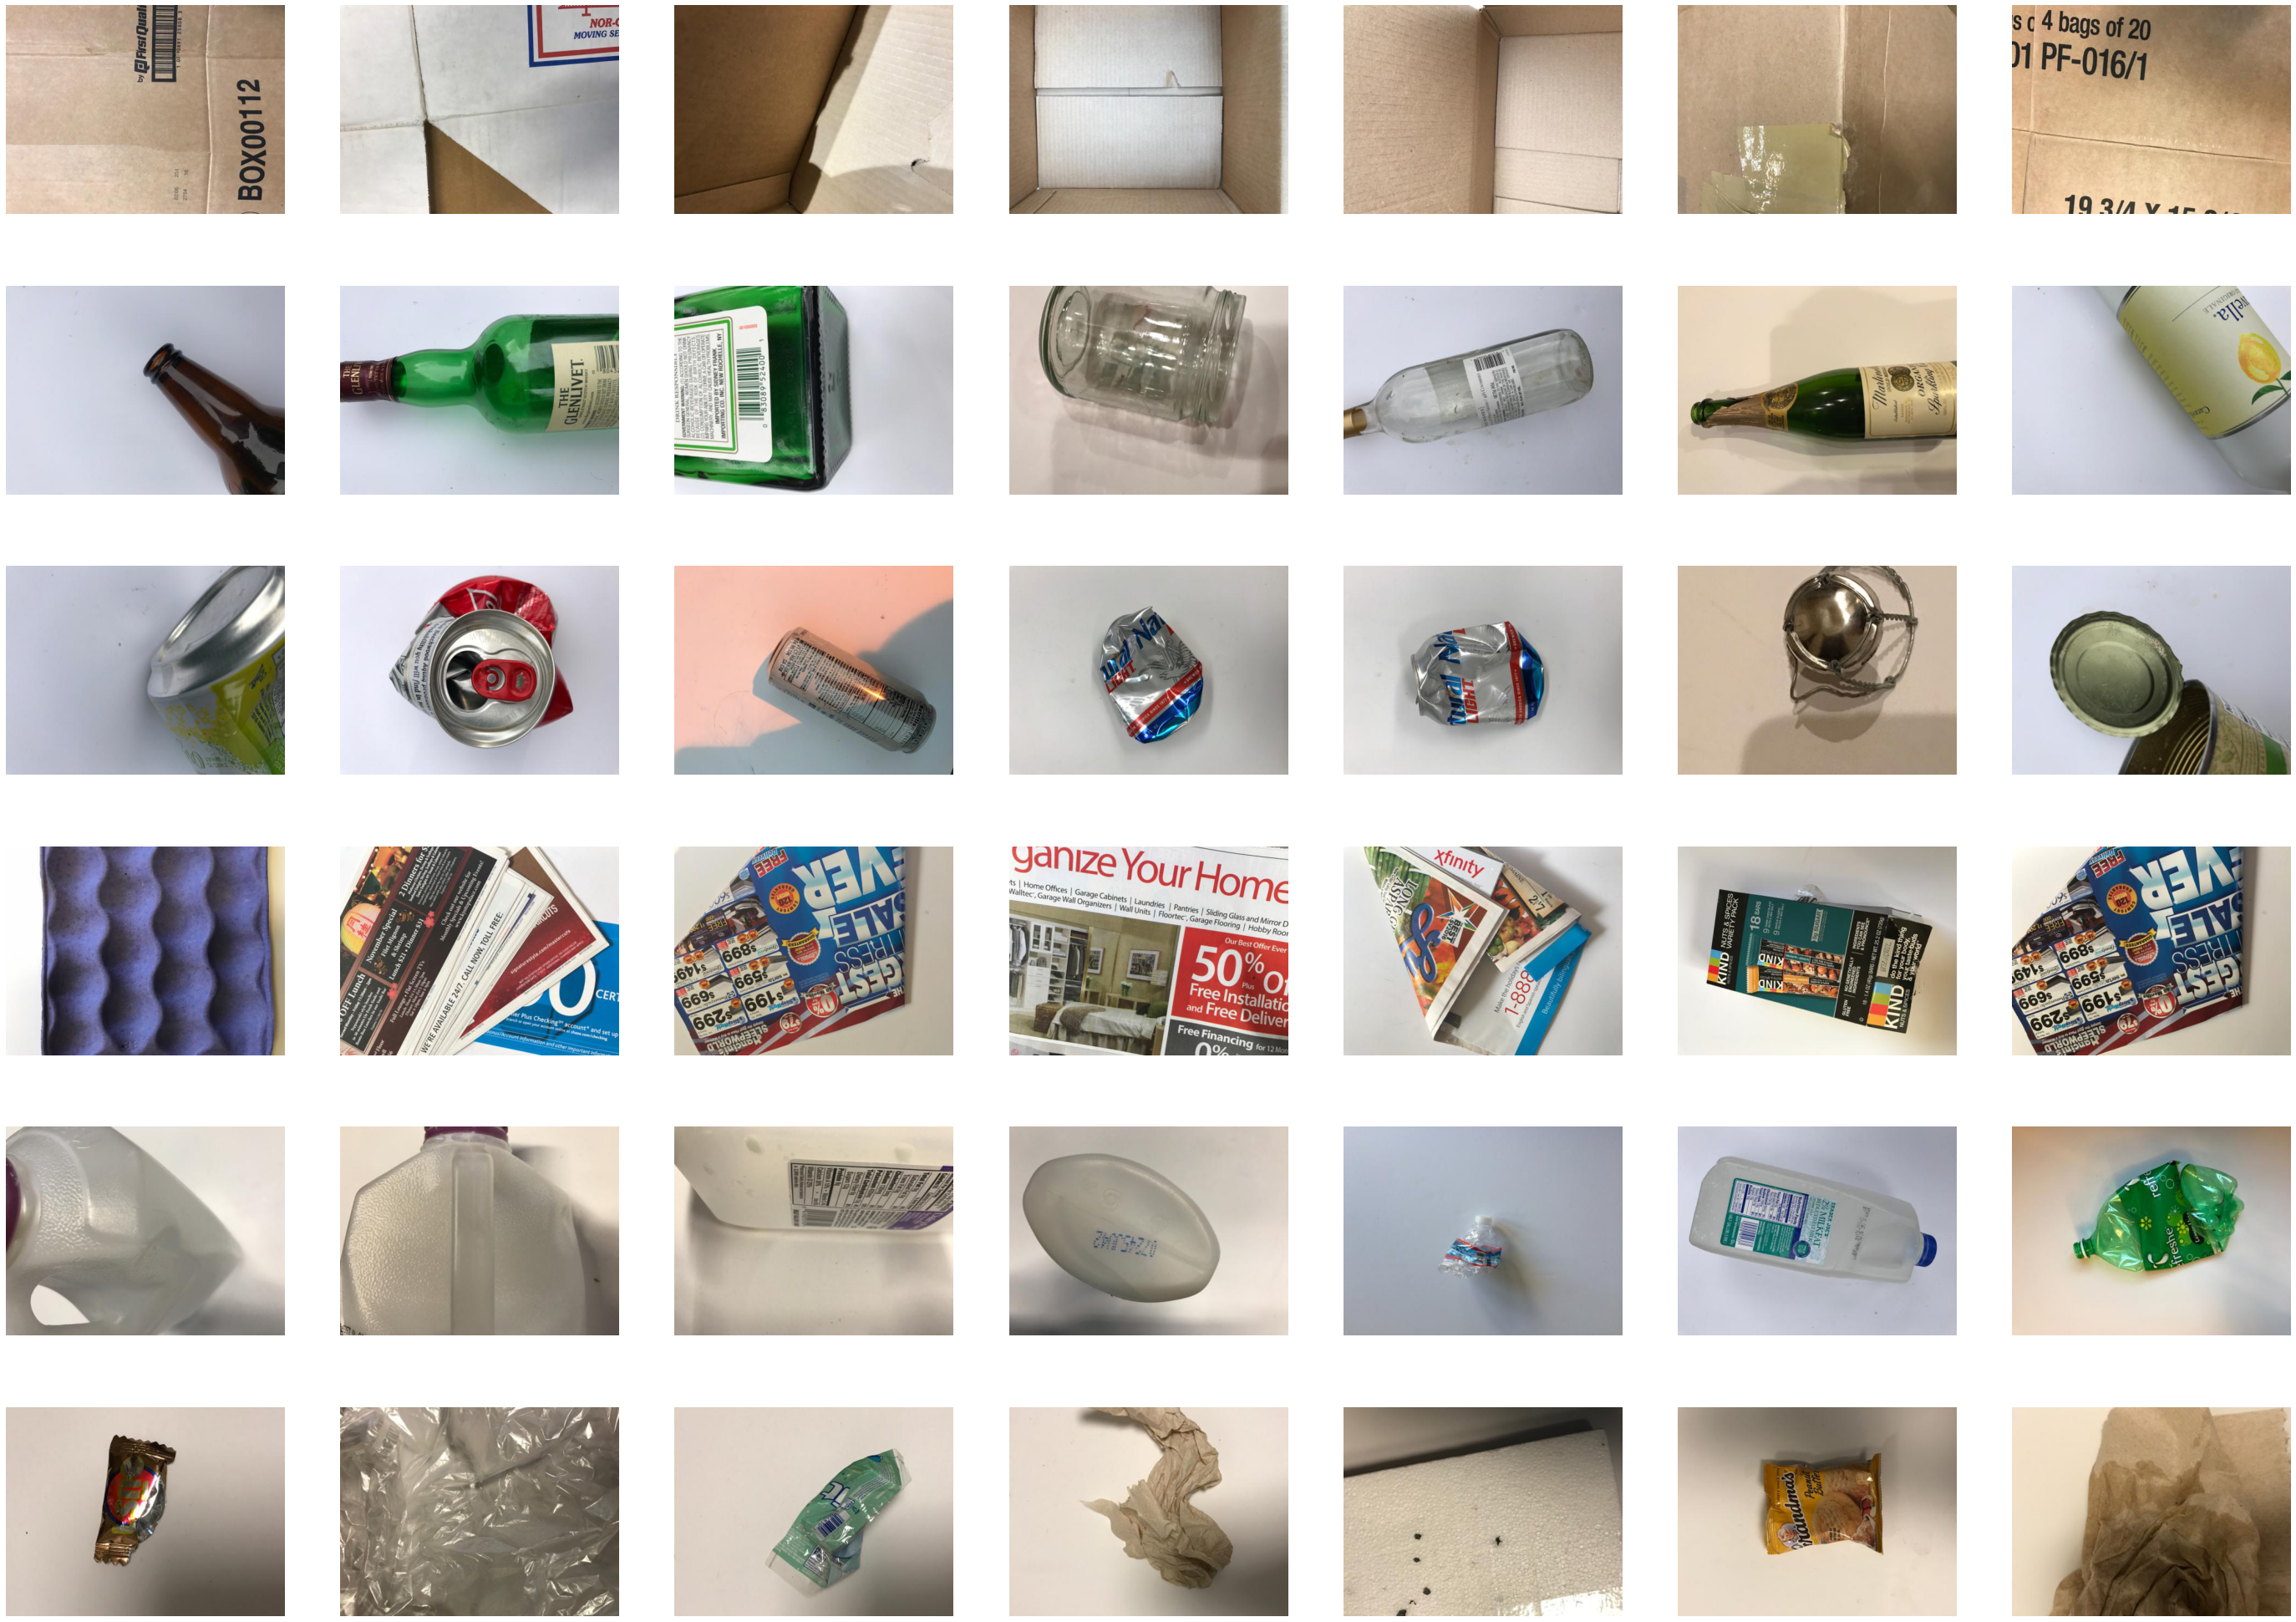

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 6)

pic_index += 8
next_cardboard_pix = [os.path.join(train_cardboard_dir, fname) 
                for fname in train_cardboard_fnames[pic_index-7:pic_index]]

next_glass_pix = [os.path.join(train_glass_dir, fname) 
                for fname in train_glass_fnames[pic_index-7:pic_index]]

next_metal_pix = [os.path.join(train_metal_dir, fname) 
                for fname in train_metal_fnames[pic_index-7:pic_index]]  

next_paper_pix = [os.path.join(train_paper_dir, fname) 
                for fname in train_paper_fnames[pic_index-7:pic_index]]

next_plastic_pix = [os.path.join(train_plastic_dir, fname) 
                for fname in train_plastic_fnames[pic_index-7:pic_index]]

next_trash_pix = [os.path.join(train_trash_dir, fname) 
                for fname in train_trash_fnames[pic_index-7:pic_index]]             


for i, img_path in enumerate(next_cardboard_pix+next_glass_pix+next_metal_pix+next_paper_pix+next_plastic_pix+next_trash_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Implementación del modelo

###Conjunto de datos emtrenamiento, validación, testeo


*   Training data - se usa para la parte de entrenamiento del modelo.
*   Validation data - se usa evaluar el modelo y ajustar los parametros.
*   Test data - se usa despues de la parte de validación para probar el modelo.




There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

##Primer modelo

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
#64 filtros de tamaño 2*2, padding es con que completar los bordes, 
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(384, 512, 3))) 
#diezmo el tamaño a la mitad
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#apago el 35% de neuronas aleatoriamente
model.add(tf.keras.layers.Dropout(0.35))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.35))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.35))

#apalsto las caracterisitcas y lo vuelvo un vector
model.add(tf.keras.layers.Flatten())
#red neuronal densa: todos con todos
model.add(tf.keras.layers.Dense(256, activation='relu'))
#dropout para evitar sobreentrenamiento
model.add(tf.keras.layers.Dropout(0.6))

#paso por la capa de salida (el numero indica las clases), siempre tengo k neuronas en la capa de salida
#softmax: fn de activacion que maximiza la separacion entre clases 
model.add(tf.keras.layers.Dense(6, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 384, 512, 64)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 192, 256, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 192, 256, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 192, 256, 32)      8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 128, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 128, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 128, 16)      

## Compilar el modelo
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [ ]:
#cate cross: mide la transferencia de info entre las clases
#el optimizador adam es bueno para redes neuronales

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Entrenamiento del modelo

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(384, 512),  # All images will be resized to 150x150
        batch_size=19,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(384, 512),
        batch_size=19,
        class_mode='categorical')

Found 1767 images belonging to 6 classes.
Found 760 images belonging to 6 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=93, # 2000 images = batch_size * steps
      epochs=12,
      validation_data=validation_generator,
      validation_steps=40  # 1000 images = batch_size * steps
      )
#verbose=3

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
93/93 [==============================] - 636s 7s/step - loss: 3.4882 - accuracy: 0.2318 - val_loss: 1.7828 - val_accuracy: 0.1895
Epoch 2/12
93/93 [==============================] - 498s 5s/step - loss: 1.7240 - accuracy: 0.2055 - val_loss: 1.7797 - val_accuracy: 0.2355
Epoch 3/12
93/93 [==============================] - 504s 5s/step - loss: 1.6885 - accuracy: 0.2636 - val_loss: 1.7612 - val_accuracy: 0.1605
Epoch 4/12
93/93 [==============================] - 503s 5s/step - loss: 1.5927 - accuracy: 0.3465 - val_loss: 1.7134 - val_accuracy: 0.3013
Epoch 5/12
93/93 [==============================] - 502s 5s/step - loss: 1.4846 - accuracy: 0.3593 - val_loss: 1.6455 - val_accuracy: 0.3974
Epoch 6/12
66/93 [====================>.........] - ETA: 2:09 - loss: 1.4144 - accuracy: 0.4251

## Se guarda el modelo con los mejores desempeños

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

OSError: ignored

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])